In [ ]:
import tensorflow as tf
from tensorflow.keras.models import save_model
import tensorflow.keras.layers as L
import numpy as np
import matplotlib.pyplot as plt
#import keras_utils
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


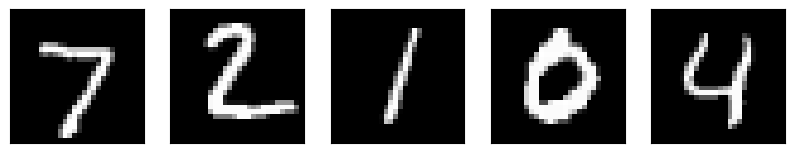

In [ ]:
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(*(28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

# Code du Simple autoencoder

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

def build_autoencoder(hidden_size=128, code_size=32,numDense1=256,numDense2=128,activation1="relu",activation2="sigmoid"):
    # Encoder
    input_size=784
    input_img = Input(shape=(input_size,))
    hidden_1 = Dense(numDense1, activation=activation1)(input_img)
    hidden_2 = Dense(numDense2, activation=activation1)(hidden_1)
    code = Dense(code_size, activation=activation1)(hidden_2)

    # Decoder
    hidden_3 = Dense(numDense2, activation=activation1)(code)
    hidden_4 = Dense(numDense1, activation=activation1)(hidden_3)
    hidden_5 = Dense(hidden_size, activation=activation1)(hidden_4)
    output_img = Dense(input_size, activation=activation2)(hidden_5)

    return input_img, output_img

#les différents models d'autoencoder simple

In [ ]:
input_img1,output_img1=build_autoencoder(hidden_size=128, code_size=32,numDense1=256,numDense2=128,activation1="relu",activation2="sigmoid")
input_img2,output_img2=build_autoencoder(hidden_size=256, code_size=32,numDense1=128,numDense2=256,activation1="relu",activation2="sigmoid")
input_img3,output_img3=build_autoencoder(hidden_size=512, code_size=32,numDense1=256,numDense2=128,activation1="elu",activation2="relu")
input_img4,output_img4=build_autoencoder(hidden_size=128, code_size=32,numDense1=256,numDense2=128,activation1="tanh",activation2="relu")
input_img5,output_img5=build_autoencoder(hidden_size=64, code_size=32,numDense1=512,numDense2=256,activation1="relu",activation2="sigmoid")
input_img6,output_img6=build_autoencoder(hidden_size=512, code_size=32,numDense1=512,numDense2=256,activation1="relu",activation2="elu")

#Phase d'entraînement

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np

# Function to calculate PSNR, SSIM, and MSE
def calculate_metrics(original, reconstructed):
    psnr_value = peak_signal_noise_ratio(original, reconstructed)
    ssim_value, _ = structural_similarity(original, reconstructed, full=True)
    mse_value = np.mean((original - reconstructed) ** 2)
    return np.abs(psnr_value), ssim_value, mse_value

# List to store the error metrics for each autoencoder
psnr_values = []
ssim_values = []
mse_values = []
from keras.models import Model
input_ouput = [
    (input_img1,output_img1),
    (input_img2,output_img2),
    (input_img3,output_img3),
    (input_img4,output_img4),
    (input_img5,output_img5),
    (input_img6,output_img6)
]

# List to store the fitted models
fitted_models = []
list_history=[]
list_reconstructed=[]

# Fit each model
for i, (input, output) in enumerate(input_ouput, 1):

    # Dynamically generate names for each autoencoder
    autoencoder_name = f"autoencoder_{i}"
    name=autoencoder_name
    autoencoder_name=Model(input, output)
    autoencoder_name.compile(optimizer='adam', loss='binary_crossentropy')
    print(f"\nTraining Model {name}")
    history = autoencoder_name.fit(x_train, x_train, epochs=10)
    list_history.append(history)
    # Generate reconstructed images
    reconstructed_images = autoencoder_name.predict(x_test)
    list_reconstructed.append(reconstructed_images)
    # Calculate metrics
    psnr, ssim, mse = calculate_metrics(x_test, reconstructed_images)
    # Store metrics in lists
    psnr_values.append(psnr)
    ssim_values.append(ssim)
    mse_values.append(mse)
    # Store the fitted model along with its name
    fitted_models.append(autoencoder_name)



Training Model autoencoder_1
Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.1478
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1055
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0978
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0938
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0915
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0897
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0883
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0873
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0864
Epoch 10/10
313/313 [==============================] - 1s 2ms/step

Training Model autoencoder_2
Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1516
Epoch 2/10
1875/1875 [=================

#Comparaison des models AE en utilisant SSIM,PSNR,MSE

In [ ]:
ssim_values

[0.9359847591121152,
 0.9411302947943936,
 0.40523313553959533,
 0.4130076715245588,
 0.9352389789564394,
 0.0745903695144937]

(0.0, 0.99)

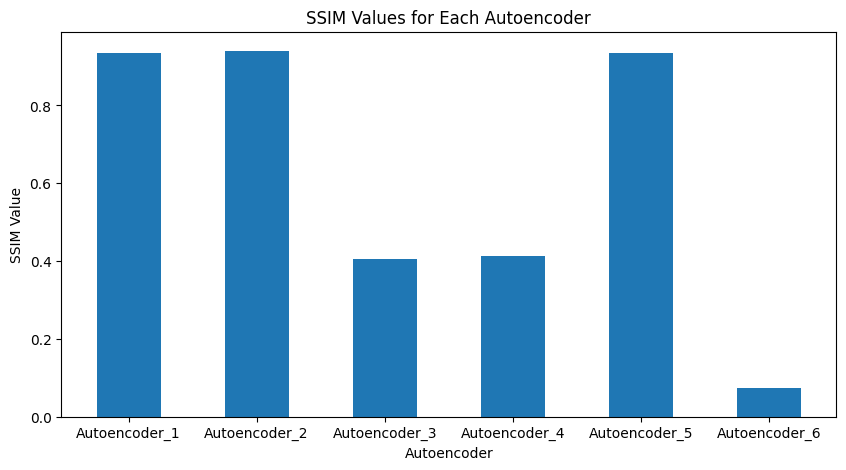

In [ ]:
# Bar plot for SSIM
fig = plt.figure(figsize=(10, 5))
plt.bar(range(1, len(ssim_values) + 1), ssim_values, width=0.5, tick_label=[f"Autoencoder_{i}" for i in range(1, len(ssim_values) + 1)])
plt.xlabel('Autoencoder')
plt.ylabel('SSIM Value')
plt.title('SSIM Values for Each Autoencoder')

# Set y-axis limits
plt.ylim(0, 0.99)

In [ ]:
psnr_values

[21.074698960601566,
 21.41745730901509,
 16.24194580948394,
 0.42540010692153374,
 21.09300866329535,
 10.31159309077081]

Text(0.5, 1.0, 'PSNR Values for Each Autoencoder')

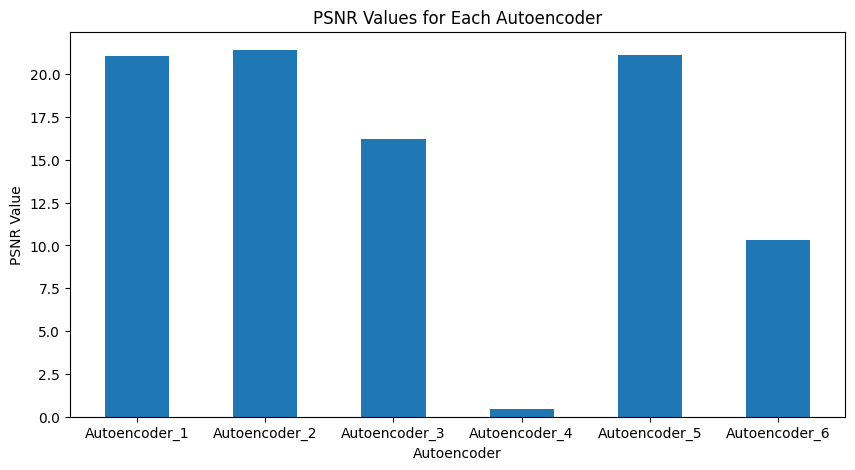

In [ ]:
# Bar plot for PSNR
fig = plt.figure(figsize=(10, 5))
plt.bar(range(1, len(psnr_values) + 1), psnr_values, width=0.5, tick_label=[f"Autoencoder_{i}" for i in range(1, len(psnr_values) + 1)])
plt.xlabel('Autoencoder')
plt.ylabel('PSNR Value')
plt.title('PSNR Values for Each Autoencoder')

In [ ]:
mse_values

[0.0078078303, 0.007215293, 42.091507, 1.1029105, 0.007774981, 0.09307666]

Text(0.5, 1.0, 'MSE Values for Each Autoencoder')

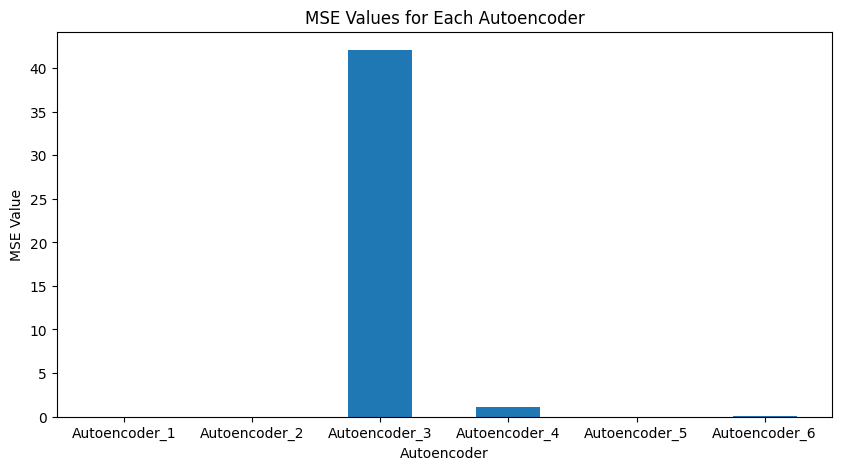

In [ ]:
# Bar plot for MSE
fig = plt.figure(figsize=(10, 5))
plt.bar(range(1, len(mse_values) + 1), mse_values, width=0.5, tick_label=[f"Autoencoder_{i}" for i in range(1, len(mse_values) + 1)])
plt.xlabel('Autoencoder')
plt.ylabel('MSE Value')
plt.title('MSE Values for Each Autoencoder')

In [ ]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('Original Images')

        # plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('Reconstructed Images')
    plt.show()

#Visualisation de quelques résultats de compression

#en utilisant l'autoencoder 2

313/313 [==============================] - 1s 2ms/step


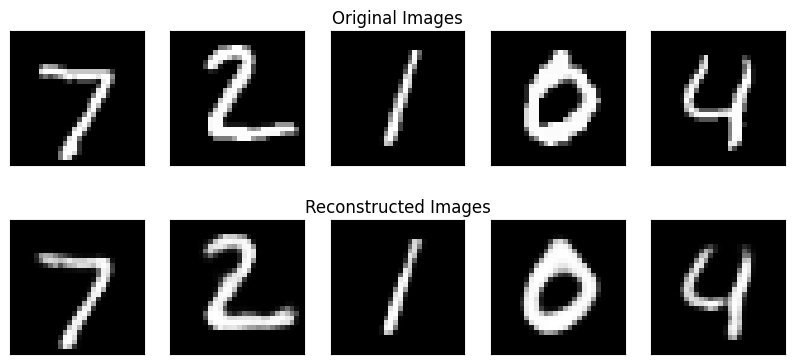

In [ ]:
plot_autoencoder_outputs(fitted_models[1], 5, (28, 28))

#en utilisant l'autoencoder6

313/313 [==============================] - 1s 2ms/step


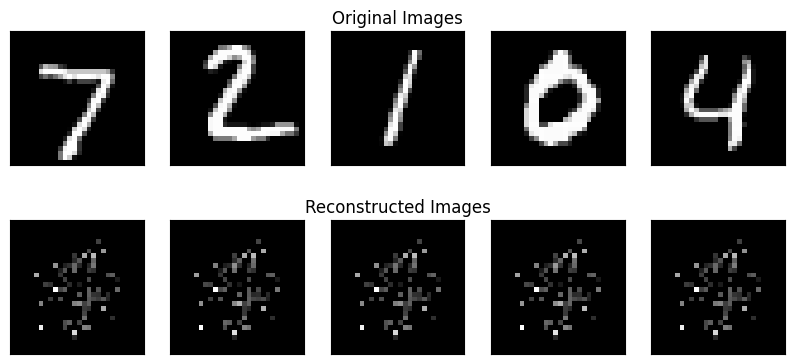

In [ ]:
plot_autoencoder_outputs(fitted_models[2], 5, (28, 28))

In [ ]:
def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = 10
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx

    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: ")

    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")

    plt.xlim(0,11)
    plt.ylim(0,3)
    plt.tight_layout()

#Courbe d'évolution de la métrique 'binary cross-entropy' durant la phase d'entraînement de chaque modèle AE.

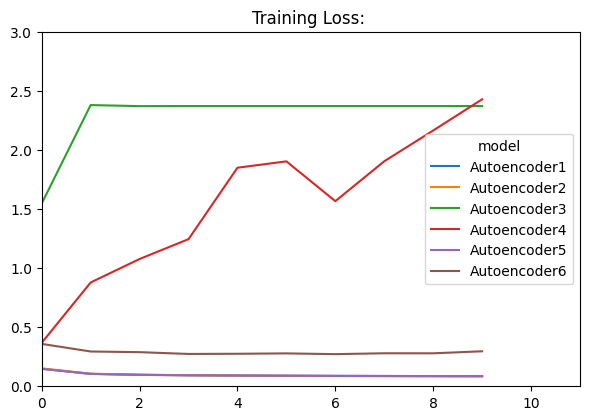

In [ ]:
plot_compare_histories(list_history,
                       ['Autoencoder1', 'Autoencoder2','Autoencoder3','Autoencoder4','Autoencoder5','Autoencoder6'], plot_accuracy=False)

In [ ]:
len(list_reconstructed[0])

10000

#Densité d'images reconstruites après compression de quelques modèles AE.

<ipython-input-33-653b61cc1795>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list_reconstructed[1][:9000],kde=True, label='autoencoder 1')


<Axes: ylabel='Density'>

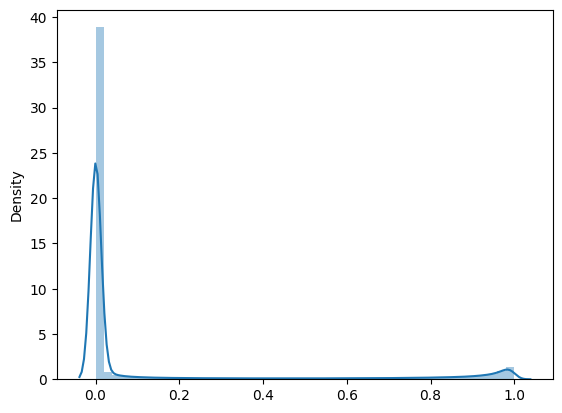

In [ ]:
import seaborn as sns
sns.distplot(list_reconstructed[1][:9000],kde=True, label='autoencoder 1')

<ipython-input-34-d32318a7d62b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list_reconstructed[2][:100],kde=True, label='autoencoder 3')


<Axes: ylabel='Density'>

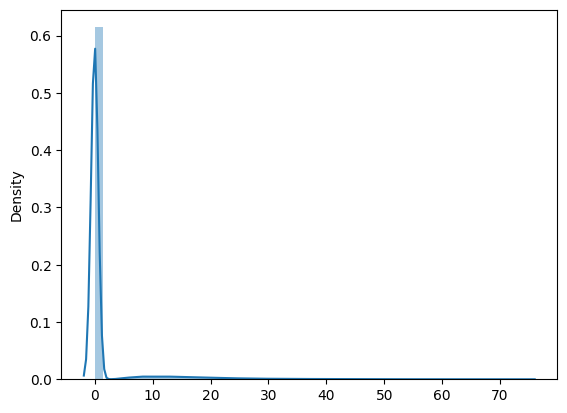

In [ ]:
import seaborn as sns
sns.distplot(list_reconstructed[2][:100],kde=True, label='autoencoder 3')

#Variational Autoencoder (l'architecture est presque identique à celle de l'autoencodeur simple en vue d'une comparaison ultérieure).

In [ ]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

def build_vae(input_size=784, hidden_size=128, code_size=32, numDense1=256, numDense2=128, activation1="relu", activation2="sigmoid"):
    # Encoder
    input_img = Input(shape=(input_size,))
    hidden_1 = Dense(numDense1, activation=activation1)(input_img)
    hidden_2 = Dense(numDense2, activation=activation1)(hidden_1)

    z_mean = Dense(code_size)(hidden_2)
    z_log_var = Dense(code_size)(hidden_2)

    # Sampling layer
    code = Lambda(sampling, output_shape=(code_size,))([z_mean, z_log_var])

    # Decoder
    hidden_3 = Dense(numDense2, activation=activation1)(code)
    hidden_4 = Dense(numDense1, activation=activation1)(hidden_3)
    hidden_5 = Dense(hidden_size, activation=activation1)(hidden_4)
    output_img = Dense(input_size, activation=activation2)(hidden_5)

    # Model
    vae = Model(input_img, output_img)

    # Reconstruction loss using binary cross-entropy
    reconstruction_loss = binary_crossentropy(input_img, output_img)
    reconstruction_loss *= input_size  # Adjust the scale

    # KL divergence term
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    # Combine the losses
    vae_loss = reconstruction_loss + kl_loss
    vae.add_loss(vae_loss)

    vae.add_loss(vae_loss)

    return vae

#les différents models VAE

In [ ]:
vae1=build_vae(input_size=784, hidden_size=128, code_size=32, numDense1=256, numDense2=128, activation1="relu", activation2="sigmoid")
vae2=build_vae(input_size=784, hidden_size=256, code_size=32, numDense1=128, numDense2=256, activation1="relu", activation2="sigmoid")
vae3=build_vae(input_size=784, hidden_size=512, code_size=32, numDense1=256, numDense2=128, activation1="elu", activation2="relu")
vae4=build_vae(input_size=784, hidden_size=128, code_size=32, numDense1=256, numDense2=128, activation1="tanh", activation2="relu")
vae5=build_vae(input_size=784, hidden_size=64, code_size=32, numDense1=512, numDense2=256, activation1="relu", activation2="sigmoid")
vae6=build_vae(input_size=784, hidden_size=512, code_size=32, numDense1=512, numDense2=256, activation1="relu", activation2="elu")

#Phase d'entrainement

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np
from tensorflow.keras.optimizers import Adam

psnr_values_vae = []
ssim_values_vae = []
mse_values_vae = []
from keras.models import Model
model_vae = [vae1,vae2,vae3,vae4,vae5,vae6]

fitted_models_vae = []
list_history_vae=[]
list_reconstructed_vae=[]

i=1
for model in model_vae :

    var_autoencoder_name = f"VAR_autoencoder_{i}"
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer)
    print(f"\nTraining Model {var_autoencoder_name}")
    history =model.fit(x_train, x_train, epochs=10)
    list_history_vae.append(history)
    reconstructed_images = model.predict(x_test)
    list_reconstructed_vae.append(reconstructed_images)
    psnr, ssim, mse = calculate_metrics(x_test, reconstructed_images)
    psnr_values_vae.append(psnr)
    ssim_values_vae.append(ssim)
    mse_values_vae.append(mse)
    fitted_models_vae.append(model)
    i+=1



Training Model VAR_autoencoder_1
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 216.6190
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 215.6674
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 215.0604
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 214.3620
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 213.8052
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 213.0877
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 212.6962
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 212.3081
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 211.9053
Epoch 10/10
313/313 [==============================] - 1s 2ms/step

Training Model VAR_autoencoder_2
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 215.2713
Epoch 2/10
1

#Evaluation des VAE avec SSIM,PSNR,MSE

In [ ]:
ssim_values_vae

[0.859796563647021,
 0.8614138299856339,
 0.4151155870184145,
 0.41939315990016746,
 0.8573675380771064,
 0.11418820314177411]

(0.0, 0.99)

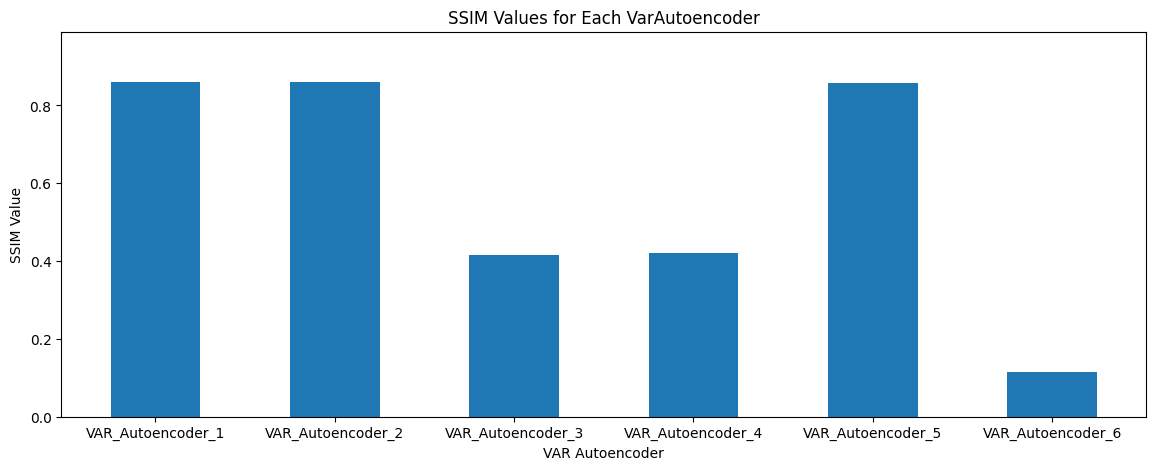

In [ ]:
# Bar plot for SSIM
fig = plt.figure(figsize=(14, 5))
plt.bar(range(1, len(ssim_values_vae) + 1), ssim_values_vae, width=0.5, tick_label=[f"VAR_Autoencoder_{i}" for i in range(1, len(ssim_values_vae) + 1)])
plt.xlabel('VAR Autoencoder')
plt.ylabel('SSIM Value')
plt.title('SSIM Values for Each VarAutoencoder')

# Set y-axis limits
plt.ylim(0, 0.99)

In [ ]:
psnr_values_vae

[17.37198324834612,
 17.444701514198513,
 37.72898610546062,
 1.5979648102554904,
 17.294810167915212,
 9.487502364021571]

Text(0.5, 1.0, 'PSNR Values for Each VAR Autoencoder')

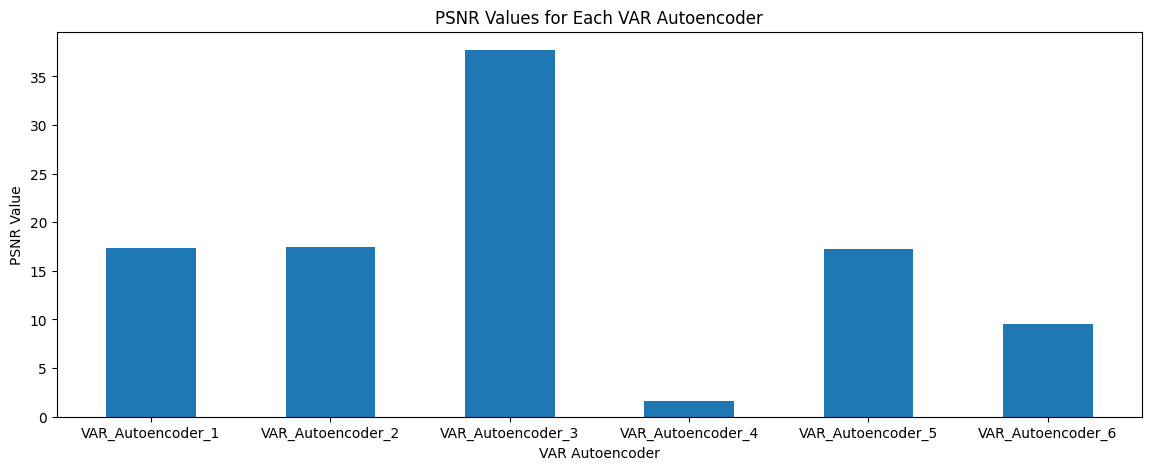

In [ ]:
# Bar plot for PSNR
fig = plt.figure(figsize=(14, 5))
plt.bar(range(1, len(psnr_values_vae) + 1), psnr_values_vae, width=0.5, tick_label=[f"VAR_Autoencoder_{i}" for i in range(1, len(psnr_values_vae) + 1)])
plt.xlabel('VAR Autoencoder')
plt.ylabel('PSNR Value')
plt.title('PSNR Values for Each VAR Autoencoder')

In [ ]:
mse_values_vae

[0.018314771, 0.01801068, 5927.8726, 0.6921551, 0.018643143, 0.11252516]

Text(0.5, 1.0, 'MSE Values for Each VAE Autoencoder')

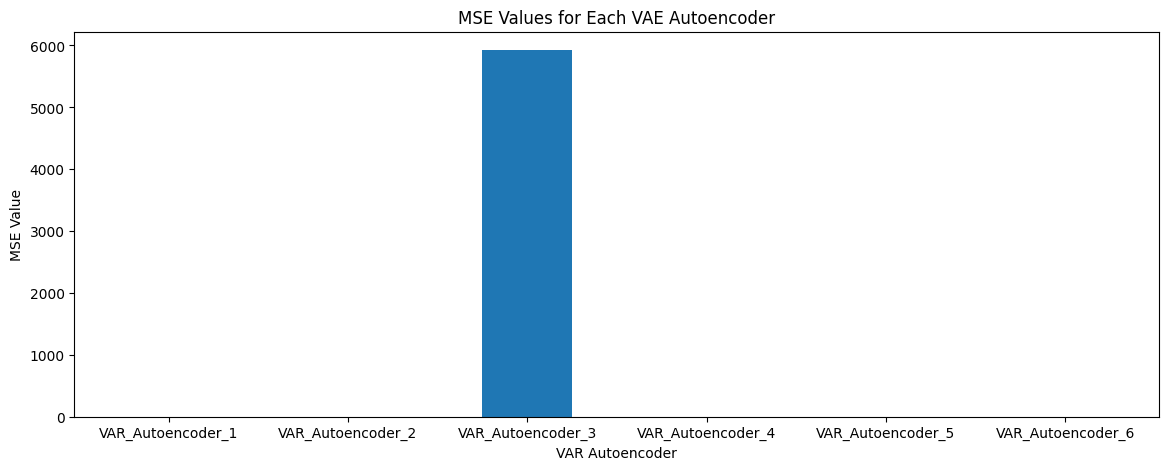

In [ ]:
# Bar plot for MSE
fig = plt.figure(figsize=(14, 5))
plt.bar(range(1, len(mse_values_vae) + 1), mse_values_vae, width=0.5, tick_label=[f"VAR_Autoencoder_{i}" for i in range(1, len(mse_values_vae) + 1)])
plt.xlabel('VAR Autoencoder')
plt.ylabel('MSE Value')
plt.title('MSE Values for Each VAE Autoencoder')

#Visualisation de quelques résultats des models VAE

313/313 [==============================] - 1s 3ms/step


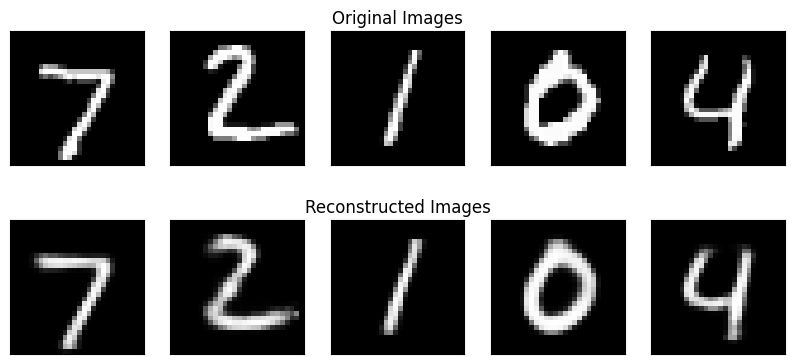

In [ ]:
plot_autoencoder_outputs(fitted_models_vae[1], 5, (28, 28))

313/313 [==============================] - 1s 3ms/step


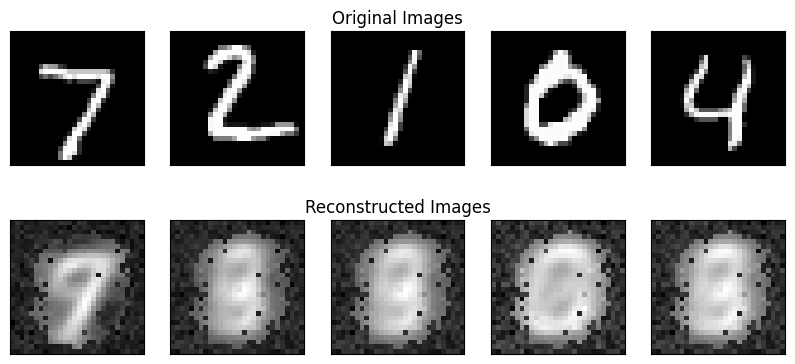

In [ ]:
plot_autoencoder_outputs(fitted_models_vae[5], 5, (28, 28))

In [ ]:
def plot_compare_histories_vae(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = 10
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx

    plt.figure(figsize=(14, 14))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: ")

    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")

    plt.xlim(0,11)
    plt.ylim(0,3500)
    plt.yticks(np.arange(0, 3501, 100))
    plt.tight_layout()

#Courbe d'évolution de la métrique 'binary cross-entropy+KL divergence' durant la phase d'entraînement de chaque modèle VAE.

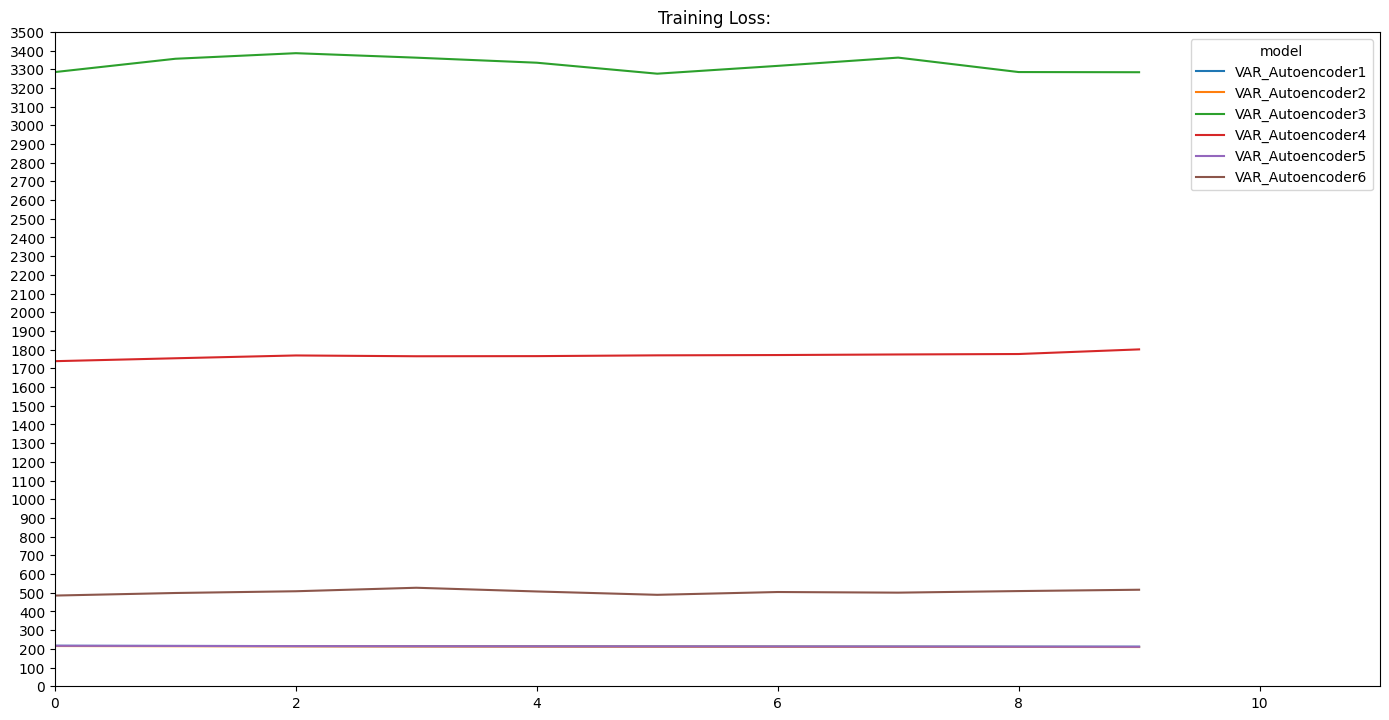

In [ ]:
plot_compare_histories_vae(list_history_vae,
                       ['VAR_Autoencoder1', 'VAR_Autoencoder2','VAR_Autoencoder3','VAR_Autoencoder4','VAR_Autoencoder5','VAR_Autoencoder6'], plot_accuracy=False)

#Densité d'images reconstruites après compression de quelques modèles VAE.

<ipython-input-76-1407dad53fe3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list_reconstructed_vae[1][:9000],kde=True, label='Var_autoencoder 2')


<Axes: ylabel='Density'>

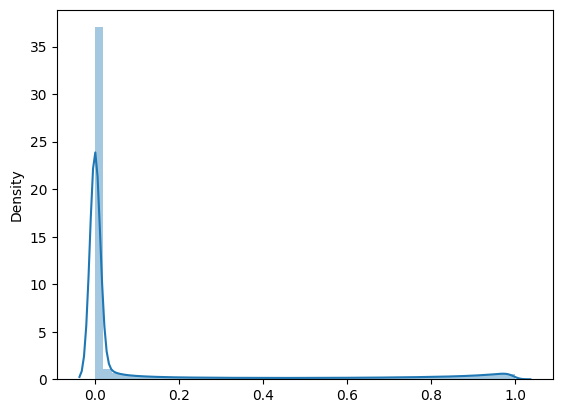

In [ ]:
sns.distplot(list_reconstructed_vae[1][:9000],kde=True, label='Var_autoencoder 2')

<ipython-input-78-efa5a471406e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list_reconstructed_vae[2][:9000],kde=True, label='Var_autoencoder 2')


<Axes: ylabel='Density'>

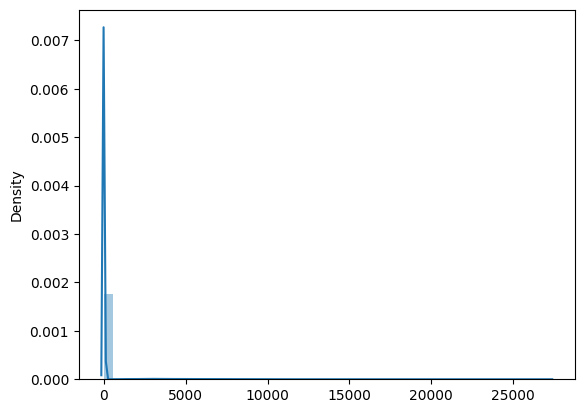

In [ ]:
sns.distplot(list_reconstructed_vae[2][:9000],kde=True, label='Var_autoencoder 2')

#VAE VS AE                                                                   

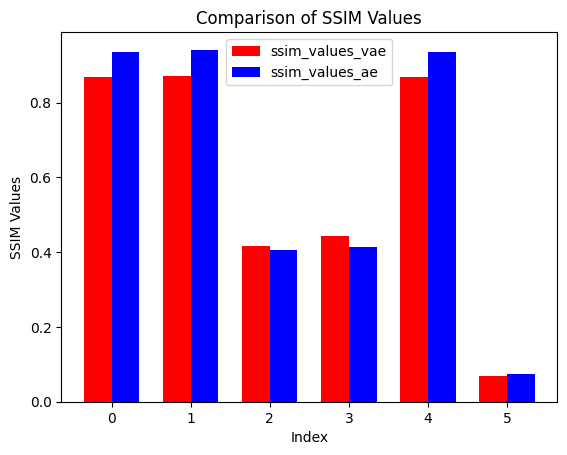

In [ ]:
indices = np.arange(len(ssim_values_vae))
bar_width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(indices, ssim_values_vae, bar_width, label='ssim_values_vae', color='red')
bar2 = ax.bar(indices + bar_width, ssim_values, bar_width, label='ssim_values_ae', color='blue')
ax.set_xlabel('Index')
ax.set_ylabel('SSIM Values')
ax.set_title('Comparison of SSIM Values')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels([str(i) for i in indices])
ax.legend()

# Afficher le graphique
plt.show()


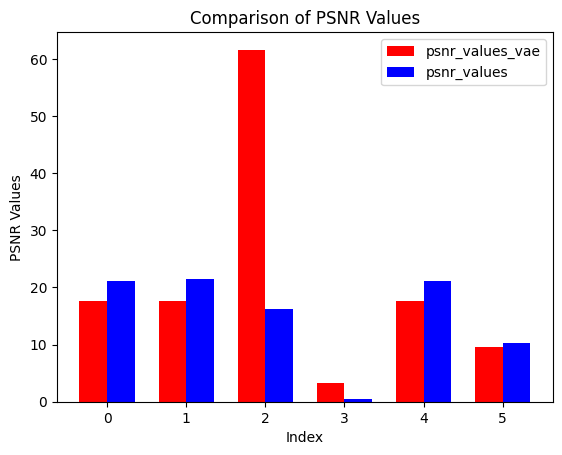

In [ ]:
indices = np.arange(len(psnr_values_vae))
bar_width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(indices, psnr_values_vae, bar_width, label='psnr_values_vae', color='red')
bar2 = ax.bar(indices + bar_width, psnr_values, bar_width, label='psnr_values', color='blue')
ax.set_xlabel('Index')
ax.set_ylabel('PSNR Values')
ax.set_title('Comparison of PSNR Values')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels([str(i) for i in indices])
ax.legend()

# Afficher le graphique
plt.show()

#Conclusion: le simple autoencodeur est plus performant qu'autoencodeur variationnel pour cette structure d'autoencodeur et ces choix d'hyperparamètres